In [1]:
import matplotlib.gridspec as grid_spec
import matplotlib.pyplot as plt
import numpy as np

import torch

In [12]:
def extract_data():
    loss = np.load('experiments/weightinit/lenet-kaiminguniform-bn/loss.npy')
    params = torch.load('experiments/weightinit/lenet-kaiminguniform-bn/param.pt')
    gradients = torch.load('experiments/weightinit/lenet-kaiminguniform-bn/grad.pt')
    return loss, params, gradients

In [13]:
loss, params, gradients = extract_data()

In [14]:
loss.shape

(12, 600)

In [15]:
x = np.arange(12*600)

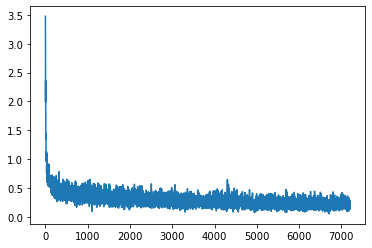

In [16]:
plt.plot(x, loss.reshape(-1))
#plt.savefig('hello.png')
plt.show()

In [19]:
gradients.keys()
np.all(gradients['0.weight'][0] == gradients['0.weight'][11])

False

In [18]:
gradients['0.weight'].shape

(12, 12, 54)

Standard deviation: 0.4667022
Standard deviation: 0.4664779
Standard deviation: 0.4648691
Standard deviation: 0.46502042
Standard deviation: 0.46344987
Standard deviation: 0.4625846
Standard deviation: 0.46196598
Standard deviation: 0.46199468
Standard deviation: 0.46151972
Standard deviation: 0.4608264
Standard deviation: 0.45966566
Standard deviation: 0.4600064


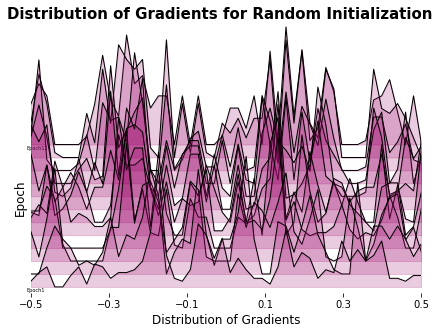

In [20]:
# ridge plots modeled after https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/
def viz_gradients():
    
    color = '#990066'; outline = '#000000'
    
    weights = gradients['0.weight']

    gs = grid_spec.GridSpec(weights.shape[0], ncols=1) # epochs by 1
    fig = plt.figure(figsize=(7,5))

    ax_objs = []
    spines = ["top", "right", "left", "bottom"]
    x_low = -0.5; x_high = 0.5

    for epoch in reversed(range(weights.shape[0])):
        # breakpoint()
        data = weights[epoch].reshape(-1, 1).squeeze() # line up all data points in one line
        print("Standard deviation: " + str(np.std(data)))
        #density = kde.gaussian_kde(data)
        x_d = np.linspace(x_low, x_high, 50)
        y_d, _ = np.histogram(a=data, bins=50, range=(x_low, x_high), density=True)
        #y_d = density(x_d)


        ax_objs.append(fig.add_subplot(gs[weights.shape[0]-1-epoch:weights.shape[0]-epoch, 0:]))
        ax_objs[-1].plot(x_d, y_d, color=outline, lw=1)
        ax_objs[-1].fill_between(x_d, y_d, alpha=0.2, color=color)

        ax_objs[-1].set_xlim(x_low, x_high)

        rect = ax_objs[-1].patch
        rect.set_alpha(0)

        ax_objs[-1].set_yticks([])
        if epoch == 0:
            ax_objs[-1].set_xlabel("Distribution of Gradients", fontsize=12)
            ax_objs[-1].set_xticks(np.arange(x_low, x_high + 1e-5, (x_high - x_low) / 5))
        else:
            ax_objs[-1].set_xticks([])

        if epoch == 0 or epoch == weights.shape[0] - 1:
            ax_objs[-1].set_ylabel("Epoch" + str(epoch + 1), fontsize=5, loc='bottom', rotation='horizontal')

        if epoch == np.ceil(weights.shape[0] / 2):
            ax_objs[-1].set_ylabel("Epoch", fontsize=12, loc='bottom')

        for s in spines:
            ax_objs[-1].spines[s].set_visible(False)

    gs.update(hspace=-0.9)
    fig.suptitle("Distribution of Gradients for Random Initialization", fontweight='bold', fontsize=15, y=0.92)
    # plt.title("Distribution of Gradients for Zeros Initialization", fontweight='bold', fontsize=15)
    # plt.savefig("random_init_gradients.pdf")
    # plt.tight_layout()
    plt.show()

viz_gradients()

In [58]:
gradients['4.weight'].shape

(12, 12, 864)

In [61]:
gradients['4.weight'][6].max()

0.48935148

In [ ]:
gradients['4.weight']